# 2.1 图像入门
## 2.1.1 显示图像

In [2]:
import cv2 as cv
img_src = r"C:\Users\xuqin\Pictures\path.jpg"
img = cv.imread(img_src, 0)
cv.imshow('image', img)
cv.namedWindow('image', cv.WINDOW_NORMAL)  # WINDOW_NORMAL 允许调整窗口大小
cv.resizeWindow('image', 800, 600)
cv.waitKey(0)
cv.destroyAllWindows()

cv.waitKey()是一个键盘绑定函数。其参数是以毫秒为单位的时间。该函数等待任何键盘事件指定的毫秒。如果您在这段时间内按下任何键，程序将继续运行。如果**0**被传递，它将无限期地等待一次敲击键。它也可以设置为检测特定的按键

cv.destroyAllWindows()只会破坏我们创建的所有窗口。如果要销毁任何特定的窗口，请使用函数 cv.destroyWindow()在其中传递确切的窗口名称作为参数。

## 2.1.2 写入图像

In [3]:
import numpy as np
import cv2 as cv
img = cv.imread(img_src,0)
cv.imshow('image',img)
k = cv.waitKey(0)
if k == 27:         # 等待ESC退出
    cv.destroyAllWindows()
elif k == ord('s'): # 等待关键字，保存和退出
    cv.imwrite(r'D:\Notebooks\cv_learn\imgs\chapter02\path_gray.jpg',img)
    cv.destroyAllWindows()

如果使用的是64位计算机，则必须k = cv.waitKey(0)按如下所示修改行：k = cv.waitKey(0) & 0xFF

## 2.1.3 使用Matplotlib

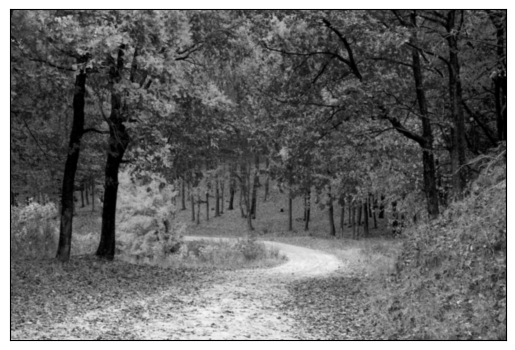

In [4]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread(img_src,0)
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # 隐藏 x 轴和 y 轴上的刻度值
plt.show()

使用Matplotlib显示彩色图片

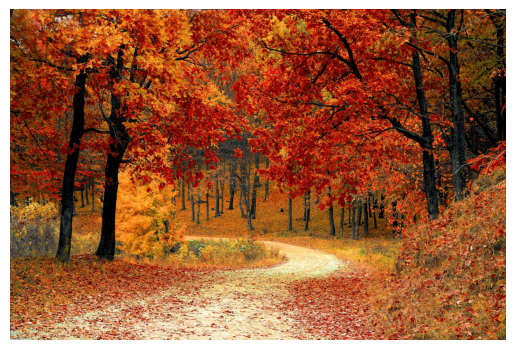

In [5]:
import cv2
import matplotlib.pyplot as plt

# 读取 BGR 图像
img_bgr = cv2.imread(img_src)  

# 方法1：用 OpenCV 转换 BGR → RGB
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# 显示正确的颜色
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

# 2.2 视频入门
## 2.2.1 从相机中读取视频

In [2]:
import numpy as np
import cv2 as cv
cap = cv.VideoCapture(0)
if not cap.isOpened():
    print("Cannot open camera")
    exit()
while True:
    # 逐帧捕获
    ret, frame = cap.read()
    # 如果正确读取帧，ret为True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    # 我们在框架上的操作到这里
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    # 显示结果帧e
    cv.imshow('frame', gray)
    if cv.waitKey(1) == ord('q'):
        break
# 完成所有操作后，释放捕获器
cap.release()
cv.destroyAllWindows()

你还可以使用cap.get(propId)方法访问该视频的某些功能，其中propId是0到18之间的一个数字。每个数字表示视频的属性（如果适用于该视频），并且可以显示完整的详细信息在这里看到：cv::VideoCapture::get()。其中一些值可以使用cap.set(propId，value)进行修改。value是你想要的新值。

例如，我可以通过cap.get(cv.CAP_PROP_FRAME_WIDTH)和cap.get(cv.CAP_PROP_FRAME_HEIGHT)检查框架的宽度和高度。默认情况下，它的分辨率为640x480。但我想将其修改为320x240。只需使用和即可。ret = cap.set(cv.CAP_PROP_FRAME_WIDTH,320) and ret = cap.set(cv.CAP_PROP_FRAME_HEIGHT,240).

## 2.2.2 从文件播放视频

In [3]:
import numpy as np
import cv2 as cv
cap = cv.VideoCapture(r'C:\leidian\LDPlayer9\data\welcome.mp4')
while cap.isOpened():
    ret, frame = cap.read()
    # 如果正确读取帧，ret为True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    cv.imshow('frame', gray)
    if cv.waitKey(1) == ord('q'):
        break
cap.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting ...


在从摄像机捕获的代码下面，沿垂直方向翻转每一帧并保存。

In [4]:
import numpy as np
import cv2 as cv
cap = cv.VideoCapture(0)
# 定义编解码器并创建VideoWriter对象
fourcc = cv.VideoWriter_fourcc(*'XVID')
out = cv.VideoWriter('videos/output.avi', fourcc, 20.0, (640,  480))
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    frame = cv.flip(frame, 0)
    # 写翻转的框架
    out.write(frame)
    cv.imshow('frame', frame)
    if cv.waitKey(1) == ord('q'):
        break
# 完成工作后释放所有内容
cap.release()
out.release()
cv.destroyAllWindows()

# 2.3 OpenCV中的绘图功能

## 2.3.1 画线

In [7]:
import numpy as np
import cv2 as cv
# 创建黑色的图像
img = np.zeros((512,512,3), np.uint8)
# 绘制一条厚度为5的蓝色对角线
cv.line(img,(0,0),(511,511),(255,0,0),5)
cv.imshow('Image', img)
cv.waitKey(0)
cv.destroyAllWindows()

## 2.3.2 画矩形

In [9]:
img = np.zeros((512,512,3), np.uint8)
cv.rectangle(img,(384,0),(510,128),(0,255,0),3)
cv.imshow('Image', img)
cv.waitKey(0)
cv.destroyAllWindows()

## 2.3.3 画圆

In [14]:
img = np.zeros((512,512,3), np.uint8)
cv.rectangle(img,(384,0),(510,128),(0,255,0),3)
cv.circle(img,(447,63), 63, (0,0,255), 5)
cv.imshow('Image', img)
cv.waitKey(0)
cv.destroyAllWindows()

## 2.3.4 画椭圆
要绘制椭圆，我们需要传递几个参数。一个参数是中心位置（x，y）。下一个参数是轴长度（长轴长度，短轴长度）。angle是椭圆沿逆时针方向旋转的角度。startAngle和endAngle表示从主轴沿顺时针方向测量的椭圆弧的开始和结束。即给出0和360给出完整的椭圆。

In [19]:
img = np.zeros((512,512,3), np.uint8)
cv.ellipse(img,(256,256),(100,50),0,0,180,255,-1)
cv.imshow('Image', img)
cv.waitKey(0)
cv.destroyAllWindows()

## 2.3.5 画多边形

In [16]:
img = np.zeros((512,512,3), np.uint8)
pts = np.array([[10,5],[20,30],[70,20],[50,10]], np.int32)
pts = pts.reshape((-1,1,2))
cv.polylines(img,[pts],True,(0,255,255))
cv.imshow('Image', img)
cv.waitKey(0)
cv.destroyAllWindows()

## 2.3.6 向图像添加文本

In [17]:
font = cv.FONT_HERSHEY_SIMPLEX
cv.putText(img,'OpenCV',(10,500), font, 4,(255,255,255),2,cv.LINE_AA)
cv.imshow('Image', img)
cv.waitKey(0)
cv.destroyAllWindows()

# 2.4 鼠标作为画笔

In [21]:
import cv2 as cv
events = [i for i in dir(cv) if 'EVENT' in i]
print( events )

['EVENT_FLAG_ALTKEY', 'EVENT_FLAG_CTRLKEY', 'EVENT_FLAG_LBUTTON', 'EVENT_FLAG_MBUTTON', 'EVENT_FLAG_RBUTTON', 'EVENT_FLAG_SHIFTKEY', 'EVENT_LBUTTONDBLCLK', 'EVENT_LBUTTONDOWN', 'EVENT_LBUTTONUP', 'EVENT_MBUTTONDBLCLK', 'EVENT_MBUTTONDOWN', 'EVENT_MBUTTONUP', 'EVENT_MOUSEHWHEEL', 'EVENT_MOUSEMOVE', 'EVENT_MOUSEWHEEL', 'EVENT_RBUTTONDBLCLK', 'EVENT_RBUTTONDOWN', 'EVENT_RBUTTONUP']


## 2.4.1 回调函数

In [24]:
import numpy as np
import cv2 as cv
# 鼠标回调函数
def draw_circle(event,x,y,flags,param):
    if event == cv.EVENT_LBUTTONDBLCLK:
        cv.circle(img,(x,y),100,(255,0,0),-1)
# 创建一个黑色的图像，一个窗口，并绑定到窗口的功能
img = np.zeros((512,512,3), np.uint8)
cv.namedWindow('image')
cv.setMouseCallback('image',draw_circle)
while(1):
    cv.imshow('image',img)
    if cv.waitKey(20) & 0xFF == 27:
        break
cv.destroyAllWindows()

## 2.4.2 交互

In [26]:
import numpy as np
import cv2 as cv
drawing = False # 如果按下鼠标，则为真
mode = True # 如果为真，绘制矩形。按 m 键可以切换到曲线
ix,iy = -1,-1
# 鼠标回调函数
def draw_circle(event,x,y,flags,param):
    global ix,iy,drawing,mode
    if event == cv.EVENT_LBUTTONDOWN:
        drawing = True
        ix,iy = x,y
    elif event == cv.EVENT_MOUSEMOVE:
        if drawing == True:
            if mode == True:
                cv.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
            else:
                cv.circle(img,(x,y),5,(0,0,255),-1)
    elif event == cv.EVENT_LBUTTONUP:
        drawing = False
        if mode == True:
            cv.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
        else:
            cv.circle(img,(x,y),5,(0,0,255),-1)
img = np.zeros((512,512,3), np.uint8)
cv.namedWindow('image')
cv.setMouseCallback('image',draw_circle)
while(1):
    cv.imshow('image',img)
    if cv.waitKey(20) & 0xFF == 27:
        break
cv.destroyAllWindows()